In [1]:
import pandas as pd                                           ##
import numpy as np

# Dataset- Load

In [2]:
df_orig = pd.read_csv(r'C:\Users\Faezeh\Downloads\housing.csv')       ##
df_orig

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# EDA

In [3]:
import matplotlib.pyplot as plt                                     ##
import seaborn as sns

In [4]:
len(df_orig)

20640

In [5]:
df_orig.columns                                                             ##

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

<Axes: xlabel='median_house_value', ylabel='Count'>

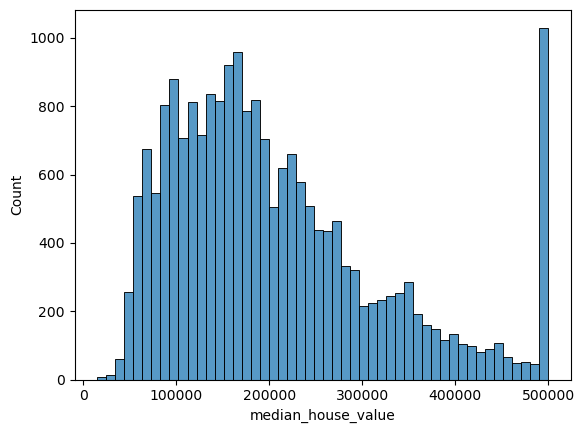

In [6]:
sns.histplot(df_orig['median_house_value'], bins = 50)                   ##

# Preparing the dataset

In [7]:
df_orig_copy = df_orig.copy()                                           ##    #~

In [8]:
df_orig['median_house_value'].describe().round(2)              ##

count     20640.00
mean     206855.82
std      115395.62
min       14999.00
25%      119600.00
50%      179700.00
75%      264725.00
max      500001.00
Name: median_house_value, dtype: float64

In [9]:
df_orig['median_house_value'].isna().sum()                       ##

0

In [10]:
df_orig['ocean_proximity'].unique()                              ##

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [11]:
#df = df[ [df['ocean_proximity'] == '<1H OCEAN']  or  [df['ocean_proximity'] == 'INLAND' ] ]


In [12]:
# Filter the dataset/dataframe- Selecting rows, where ocean_proximity is either '<1H OCEAN' or 'INLAND' 
df = df_orig[ (df_orig['ocean_proximity'] == '<1H OCEAN')  |  (df_orig['ocean_proximity'] == 'INLAND' ) ]
#df_filtered

In [13]:
# Selecting rows, where ocean_proximity is either '<1H OCEAN' or 'INLAND' 
##condition1 = df[ df['ocean_proximity'] == '<1H OCEAN' ]
#condition1 =  df['ocean_proximity'] == '<1H OCEAN'                            ##
#condition1

In [14]:
##condition2 = df[ df['ocean_proximity'] == 'INLAND' ]
#condition2 = df['ocean_proximity'] == 'INLAND'                                 ##
#condition2

In [15]:
##df_filtered = condition1 | condition2
#df_filtered = df[condition1 | condition2]                  ##
#df_filtered

In [16]:
df.columns                    ##

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [17]:
#np.asarray(df_filtered.columns)
#number_of_columns = len(df_filtered.columns)
#number_of_columns

In [18]:
#df_filtered = df_filtered.columns[:len(df_filtered.columns) - 1]
#df_filtered

In [19]:
# Selecting columns
df = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']]                                                                            ##
#df

In [20]:
len(df)

15687

In [21]:
#df['longitude']

In [22]:
#df_filtered[['longitude', 'latitude']]


## Q1

In [23]:
df.isna().sum()   ##

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

## Q2

In [24]:
df['population'].describe().round(2)   ##

count    15687.00
mean      1466.32
std       1180.39
min          3.00
25%        802.00
50%       1195.00
75%       1777.00
max      35682.00
Name: population, dtype: float64

In [25]:
df['population'].median()    ##

1195.0

## Prepare and split the dataset

In [26]:
# Set Random Seed 42 and shuffle the dataset
np.random.seed(42)                                        ##
df_len = len(df)
idx = np.arange(df_len)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]

In [27]:
np.random.seed(42)
val_size = int(df_len * 0.2)                                   ##
test_size = int(df_len * 0.2)
train_size = df_len - (val_size + test_size)
#train_size2 = len(df_filtered) - val_size - test_size

In [28]:
train_size, val_size, test_size, #train_size2                             ##

(9413, 3137, 3137)

In [29]:
df_train = df_shuffled.iloc[:train_size].copy()                                   ##
#df_train
df_val = df_shuffled.iloc[train_size : train_size + val_size].copy() 
df_test = df_shuffled.iloc[train_size + val_size : ].copy()             

df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0
...,...,...,...,...,...,...,...,...,...
20157,-119.15,34.44,33.0,2005.0,392.0,1043.0,351.0,5.3080,297900.0
20005,-119.13,36.13,28.0,1673.0,385.0,1434.0,371.0,2.0586,40900.0
6691,-118.08,34.13,46.0,1238.0,147.0,377.0,145.0,8.4546,500001.0
3470,-118.46,34.29,24.0,3668.0,890.0,3151.0,810.0,3.0526,183300.0


In [30]:
#df_train = df_filtered.iloc[idx[:train_size]]                              ## # .copy() ??
#df_val = df_filtered.iloc[idx[train_size : train_size + val_size]]
#df_test = df_filtered.iloc[idx[train_size + val_size : ]]        

In [31]:
len(df_train), len(df_val), len(df_test)                     ##  #to check if every thing is fine

(9413, 3137, 3137)

In [32]:
########################                 Alexey
#y_train_orig = df_train.msrp.values
#y_val_orig = df_val.msrp.values
#y_test_orig = df_test.msrp.values
##########################

In [33]:
##############################                     # I didn't run this cell
#df_train = df_train.reset_index(drop = True)                    ##
##df_train
#df_val = df_val.reset_index(drop = True)
#df_test = df_test.reset_index(drop = True)
################################

In [34]:
df_train['median_house_value']

19963     70400.0
5929     224500.0
11377    260900.0
6443     233100.0
17546    289100.0
           ...   
20157    297900.0
20005     40900.0
6691     500001.0
3470     183300.0
5498     276300.0
Name: median_house_value, Length: 9413, dtype: float64

In [35]:
#np.log1p(df_shuffled['median_house_value']).values    ''' ??? Why didn't we apply the log transformation on the
                                                            #...whole col "median_house_value" of the df_shuffled??'''
y_train = np.log1p(df_train['median_house_value']).values              ##   # .values gives the result in a numpy array 
y_val = np.log1p(df_val['median_house_value']).values
y_test = np.log1p(df_test['median_house_value']).values

In [36]:
#y_train

In [37]:
# Delete target variable (lables), not to use them accidentally during training the model
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

# Q3

In [38]:
df_shuffled.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### 'Total_bedroom' col. filled with 0

In [39]:
# Option 1: Fill with 0
df_filled_zero = df['total_bedrooms'].fillna(0)

In [40]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])  # appends column-wise the col. of ones to the feature matrix X

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]   # the coefficients for our Linear Regression- w[0]: is bias, W[1:]: is the weights

In [41]:
df_train.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
dtype: object

In [42]:
len(df_train.dtypes)

8

In [43]:
features = df_train.columns.values
#features[len(features)-1]
features

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [44]:
df_train[features]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
19963,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875
5929,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125
11377,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301
6443,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422
17546,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306
...,...,...,...,...,...,...,...,...
20157,-119.15,34.44,33.0,2005.0,392.0,1043.0,351.0,5.3080
20005,-119.13,36.13,28.0,1673.0,385.0,1434.0,371.0,2.0586
6691,-118.08,34.13,46.0,1238.0,147.0,377.0,145.0,8.4546
3470,-118.46,34.29,24.0,3668.0,890.0,3151.0,810.0,3.0526


In [45]:
#df_train['longitude']

In [46]:
#df_train[['longitude', 'latitude']]

In [47]:
#features = ['longitude', 'latitude']     ##
X_train = df_train[features].values
#X_train

In [48]:
y_train                             ##(#)  #Khodam

array([11.16196275, 12.32163544, 12.4718963 , ..., 13.12236738,
       12.11888489, 12.52924613])

In [49]:
#df_train.isna().sum()

###  Filling the Nans (Missing values) with Zeros

In [50]:
#'Total_bedroom' col. filled with its df_TRAIN mean- Fill the Nans (same pre-processing for all 3 subsets) with 
#... the mean of TRAINing data only. IF you get the mean of the whole column, it's cheating. Bcs you have used somehow the 
#... Test data infos !!!


In [51]:
# Fill all Nans with 0          ##      ######### Q: Why only the training data subset is filled with zeros?########## Q
X_train_filled_zero = df_train[features].fillna(0).values  # .values creates a np.array directly
X_train_filled_zero.shape

(9413, 8)

In [52]:
 df_train[features].fillna(0).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
19963,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875
5929,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125
11377,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301
6443,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422
17546,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306


In [53]:
w0, w = train_linear_regression(X_train_filled_zero, y_train) ## # We first got nans, bcz our training data has nan values-we'll fix this in upper rows
                                                                 # Use w0 and w weights to make predictions !!
w.shape

(8,)

In [54]:
y_pred_z = w0 + X_train_filled_zero.dot(w)

<Axes: ylabel='Count'>

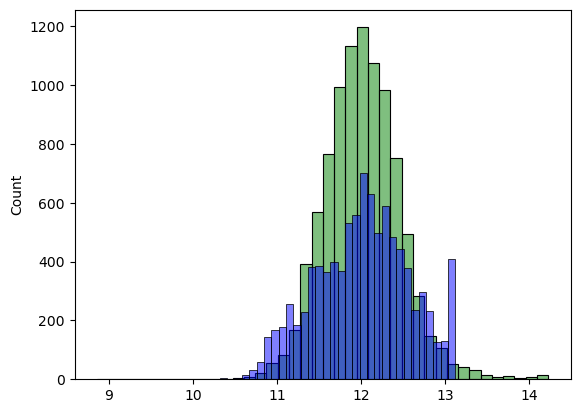

In [55]:
# Plot the Prediction (y_pred), to compare with the 
sns.histplot(y_pred_z, color = 'green', alpha = 0.5, bins = 40)   # Predictions/ predicted lables
sns.histplot(y_train, color = 'blue', alpha = 0.5,  bins = 40)  # Target variables/ Actual lables

###  Filling the Nans (Missing values) with its 'TRAINNG DATASET' subset's mean value 

In [56]:
df_train_mean = df_train['total_bedrooms'].mean()    ##?
df_train_mean

542.552956325786

In [57]:
df_train['total_bedrooms'] = df_train['total_bedrooms'].fillna(df_train_mean)  #Q?? How can I make sure that the NANS of the data frame are actually filled?
X_train_filled_mean = df_train[features].values     ##?
#X_train_filled_mean.shape

In [58]:
#df_val_filled_mean = df_val['total_bedrooms'].fillna(df_train_mean)    ##(?)    Am
#df_test_filled_mean = df_test['total_bedrooms'].fillna(df_train_mean)

In [59]:
w0, w = train_linear_regression(X_train_filled_mean, y_train)
w.shape

(8,)

In [60]:
y_pred_m = w0 + X_train_filled_mean.dot(w) 

<Axes: ylabel='Count'>

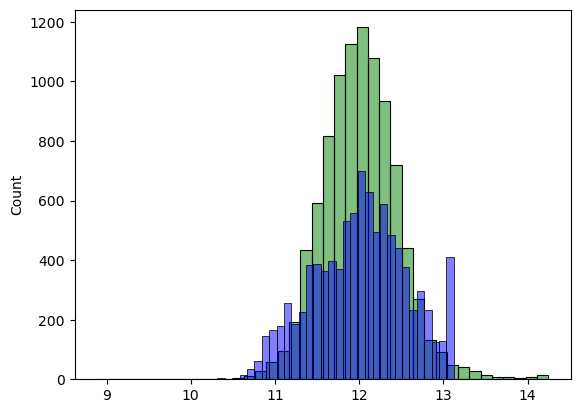

In [61]:
# Plot the Prediction (y_pred), to compare with the 
sns.histplot(y_pred_m, color = 'green', alpha = 0.5, bins = 40)   # Predictions/ predicted lables
sns.histplot(y_train, color = 'blue', alpha = 0.5,  bins = 40)  # Target variables/ Actual lables

### RMSE

In [62]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [63]:
rmse_fill_zero = rmse(y_train, y_pred_z).round(2)
rmse_fill_zero

0.34

In [64]:
rmse_fill_mean = rmse(y_train, y_pred_m).round(2)
rmse_fill_mean

0.34

In [65]:
print(f'Filling the missing valus with both alternatives gives the same RMSE: {rmse_fill_zero}')

Filling the missing valus with both alternatives gives the same RMSE: 0.34


# Q4

In [66]:
def prepare_X(df):       # prepare feature Matrix X =~   X_train_filled_zero = df_train[features].fillna(0).values

    df_num = df[features]
    df_num = df_num.fillna(0)  # Fill the NANs with 0
    X = df_num.values
    
    return X

In [67]:
r_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

def train_linear_regression_reg(X, y, r=r_values):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [68]:
X_train = prepare_X(df_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
#y_pred_v.shape

In [69]:
for r in r_values:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f' % (r, w0, score))

    0, -9.89, 0.34
1e-06, -9.89, 0.34
0.0001, -9.88, 0.34
0.001, -9.87, 0.34
 0.01, -9.68, 0.34
  0.1, -8.15, 0.34
    1, -3.16, 0.34
    5, -0.85, 0.34
   10, -0.44, 0.34


# Q5

In [70]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seed_values:
    np.random.seed(seed)                                       
    df_len = len(df)
    idx = np.arange(df_len)
    np.random.shuffle(idx)
    df_shuffled = df.iloc[idx]
    
    val_size = int(df_len * 0.2)                                  
    test_size = int(df_len * 0.2)
    train_size = df_len - (val_size + test_size)
    
    df_train = df_shuffled.iloc[:train_size].copy()                                   
    df_val = df_shuffled.iloc[train_size : train_size + val_size].copy() 
    df_test = df_shuffled.iloc[train_size + val_size : ].copy()
    
    y_train = np.log1p(df_train['median_house_value']).values             
    y_val = np.log1p(df_val['median_house_value']).values
    y_test = np.log1p(df_test['median_house_value']).values
    
    score = rmse(y_val, y_pred)
    rmse_scores.append(score)
    
df = df.copy()
df['total_bedrooms'] = df['total_bedrooms'].fillna(0)

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])  # appends column-wise the col. of ones to the feature matrix X

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]
    
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [71]:
rmse_scores

[0.726588855483319,
 0.723452760112242,
 0.7403542970318056,
 0.7254773002408268,
 0.739434113168305,
 0.7374809583124824,
 0.7375955088616364,
 0.7342673797510547,
 0.7332513116353159,
 0.7400212103355325]

In [72]:
np.std(rmse_scores).round(3)

0.006

# Q6

In [73]:
np.random.seed(9)                                       
df_len = len(df)
idx = np.arange(df_len)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]
    
val_size = int(df_len * 0.2)                                  
test_size = int(df_len * 0.2)
train_size = df_len - (val_size + test_size)
    
df_train = df_shuffled.iloc[:train_size].copy()                                   
df_val = df_shuffled.iloc[train_size : train_size + val_size].copy() 
df_test = df_shuffled.iloc[train_size + val_size : ].copy()
    
y_train = np.log1p(df_train['median_house_value']).values             
y_val = np.log1p(df_val['median_house_value']).values
y_test = np.log1p(df_test['median_house_value']).values

In [74]:
df_full_train = pd.concat([df_train, df_val])

In [75]:
df_full_train = df_full_train.reset_index(drop = True)

In [76]:
X_full_train = prepare_X(df_full_train)
#X_full_train

In [77]:
y_full_train = np.concatenate([y_train, y_val])
#y_full_train

In [78]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r = 0.001)

In [79]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score_rounded = score.round(2)
print(f"RMSE on Test Dataset: {score_rounded}")
#print("RMSE on Test Dataset:",score.round(2))

RMSE on Test Dataset: 0.33
